In [1]:
# notebooks/01_data_loading.ipynb

In [2]:
pip install ucimlrepo

In [3]:
# Step 1: Setup path and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import logging
sys.path.append(os.path.abspath(".."))

from src import config # Import config first to set up logging
from src.data_processing import fetch_and_prepare_data

# Configure plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
logger = logging.getLogger(__name__)
logger.info("Notebook 01: Data Loading & EDA Started")

2025-04-23 20:30:04,485 - INFO - 783355396 - Notebook 01: Data Loading & EDA Started


In [4]:
# Cell 2: Fetch and Prepare Data
try:
    X_train, X_test, y_train, y_test = fetch_and_prepare_data()
    logger.info("Data fetched and split successfully.")
    # Combine train data for EDA
    train_df = X_train.copy()
    train_df[config.BINARY_TARGET_COLUMN] = y_train
except Exception as e:
    logger.error(f"Failed to load data in notebook: {e}", exc_info=True)
    train_df = None # Set to None to prevent errors in subsequent cells

2025-04-23 20:30:30,375 - INFO - data_processing - Fetching dataset ID: 45
2025-04-23 20:30:35,794 - INFO - data_processing - Dataset fetched.
2025-04-23 20:30:35,822 - INFO - data_processing - Raw data saved to C:\Users\CCLeyton\bio-ml-jupyter\data\heart_disease_raw.csv
2025-04-23 20:30:35,844 - INFO - data_processing - Created binary target column 'target'. Distribution:
target
0    0.541254
1    0.458746
Name: proportion, dtype: float64
2025-04-23 20:30:35,863 - WARNING - data_processing - Missing values detected BEFORE split:
ca      4
thal    2
dtype: int64
2025-04-23 20:30:35,870 - INFO - data_processing - Splitting data (test ratio=0.2, random_state=42)
2025-04-23 20:30:35,894 - INFO - data_processing - Split complete. Train shape: (242, 13), Test shape: (61, 13)
2025-04-23 20:30:35,898 - INFO - 3238738325 - Data fetched and split successfully.


In [5]:
# Cell 3: Basic Info & Missing Values (on Training Data)
if train_df is not None:
    print("--- Training Data Info ---")
    train_df.info()
    print("\n--- Training Data Description ---")
    print(train_df.describe(include='all').T)
    print("\n--- Missing Values (Train Set) ---")
    missing_vals = train_df.isnull().sum()
    print(missing_vals[missing_vals > 0])
else:
    print("Data loading failed, skipping EDA.")

--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 180 to 16
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        241 non-null    float64
 12  thal      241 non-null    float64
 13  target    242 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 28.4 KB

--- Training Data Description ---
          count        mean        std    min     25%    50%     75%    max
age       242.0   54.549587   8.996981   29.0   48.00   56.0   61.00   77.0
sex      

2025-04-23 20:32:11,333 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



--- Target Distribution (Train Set) ---
target
0    0.541322
1    0.458678
Name: proportion, dtype: float64


C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2529655583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=config.BINARY_TARGET_COLUMN, data=train_df, palette='viridis')
2025-04-23 20:32:11,437 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


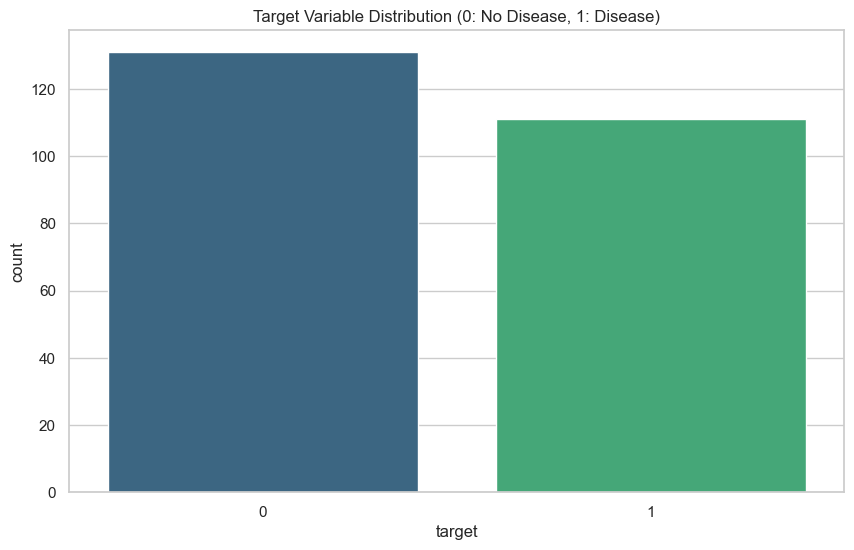

In [6]:
# Cell 4: Target Variable Distribution
if train_df is not None:
    print("\n--- Target Distribution (Train Set) ---")
    print(train_df[config.BINARY_TARGET_COLUMN].value_counts(normalize=True))
    sns.countplot(x=config.BINARY_TARGET_COLUMN, data=train_df, palette='viridis')
    plt.title('Target Variable Distribution (0: No Disease, 1: Disease)')
    plt.show()


--- Numerical Features (13) ---


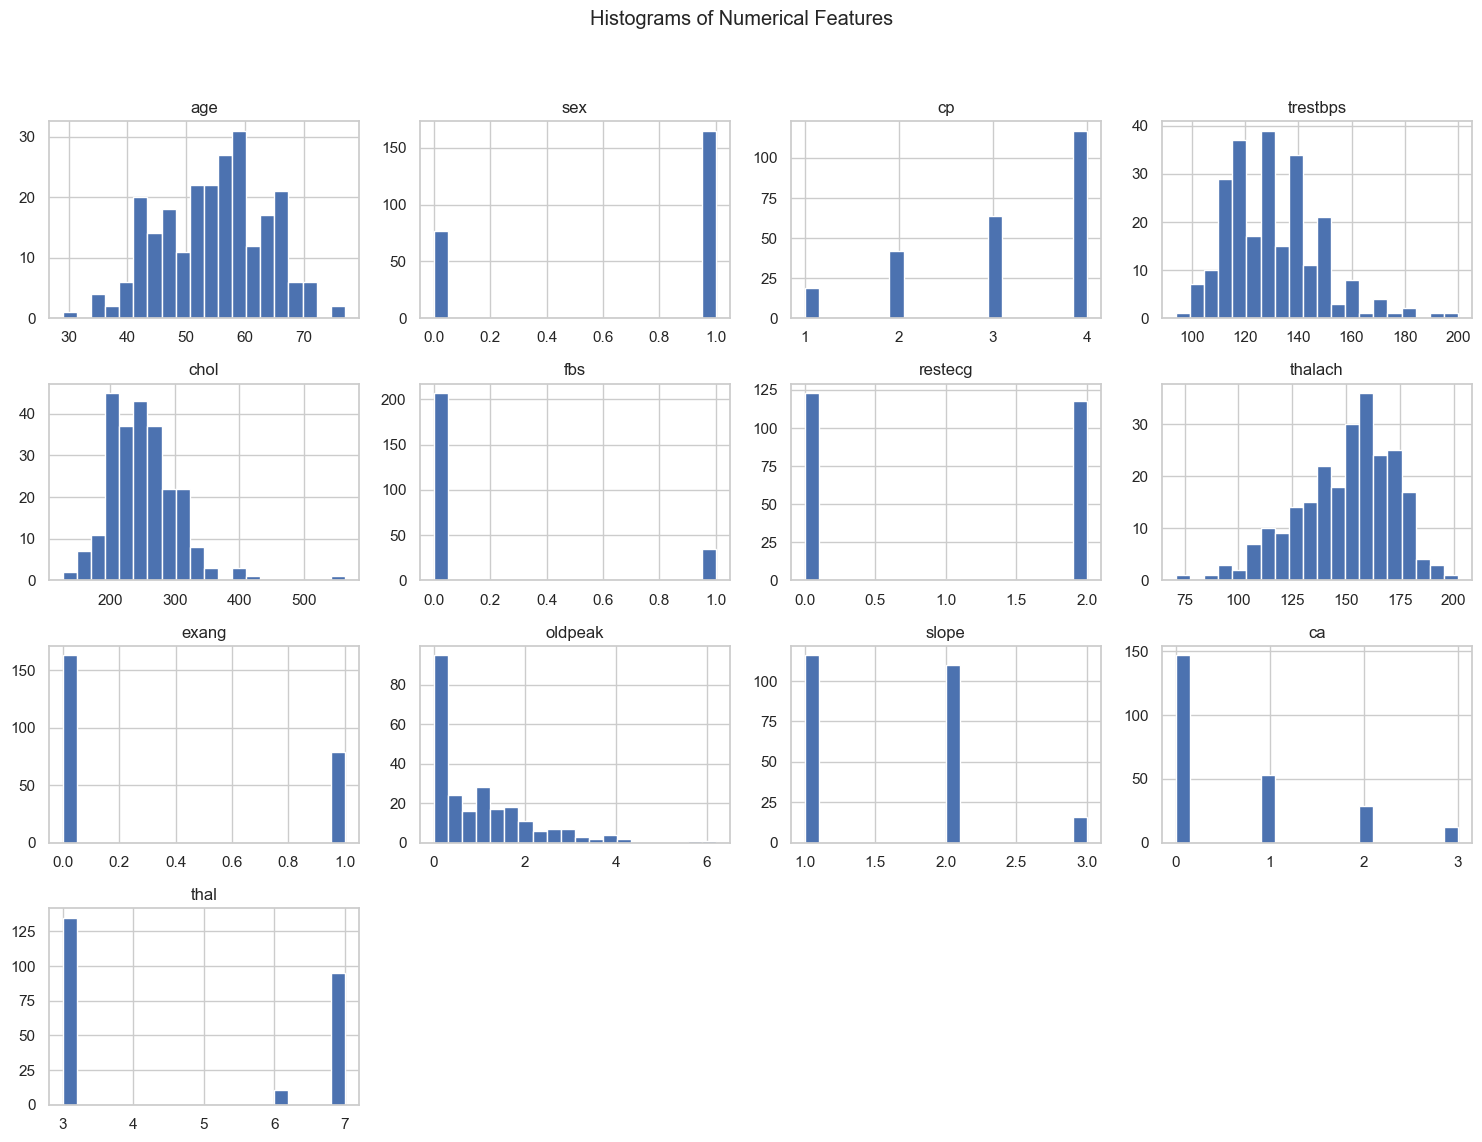

In [7]:
# Cell 5: Numerical Feature Exploration (Histograms)
if train_df is not None:
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
    print(f"\n--- Numerical Features ({len(numerical_cols)}) ---")
    train_df[numerical_cols].hist(bins=20, figsize=(15, 12), layout=(-1, 4))
    plt.suptitle("Histograms of Numerical Features")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

2025-04-23 20:33:29,922 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:29,955 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



--- Numerical Features vs Target (Box Plots) ---


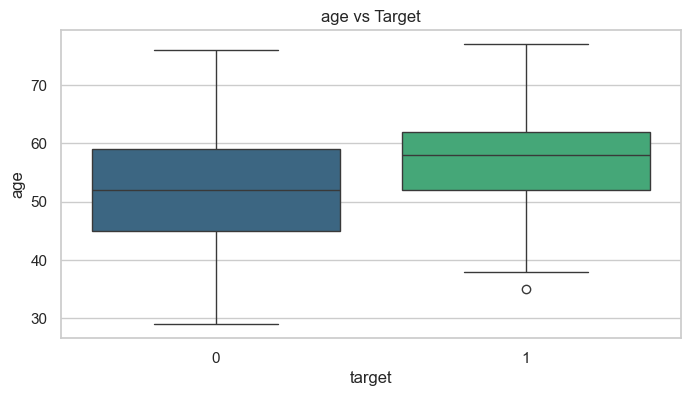

2025-04-23 20:33:30,466 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:30,504 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


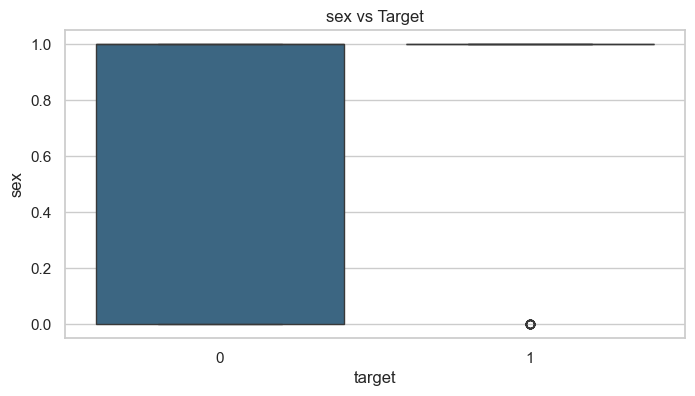

2025-04-23 20:33:31,069 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:31,110 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


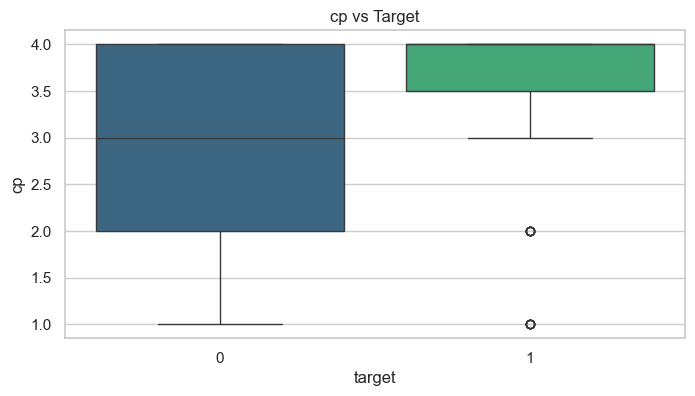

2025-04-23 20:33:31,655 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:31,699 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


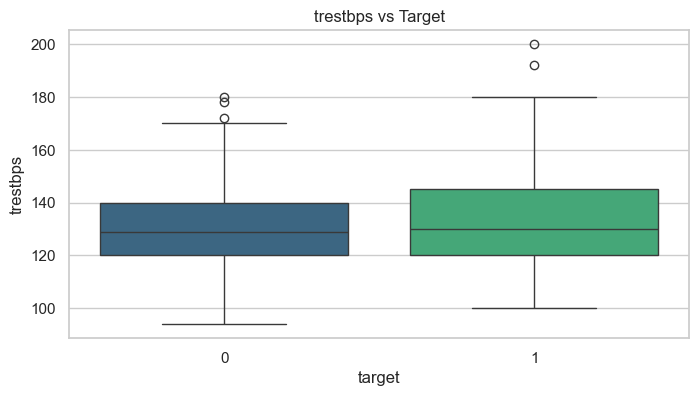

2025-04-23 20:33:32,206 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:32,247 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


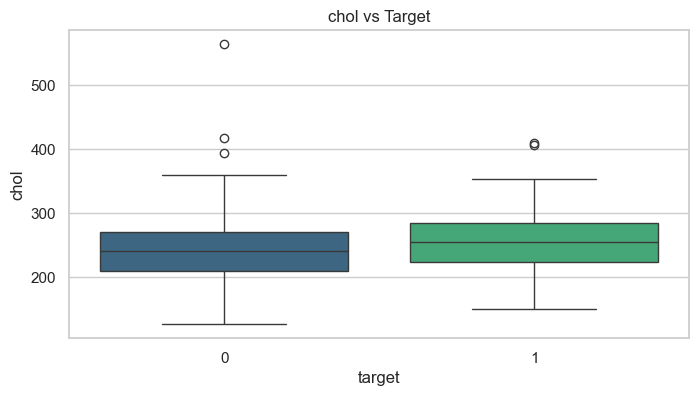

2025-04-23 20:33:32,696 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:32,725 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


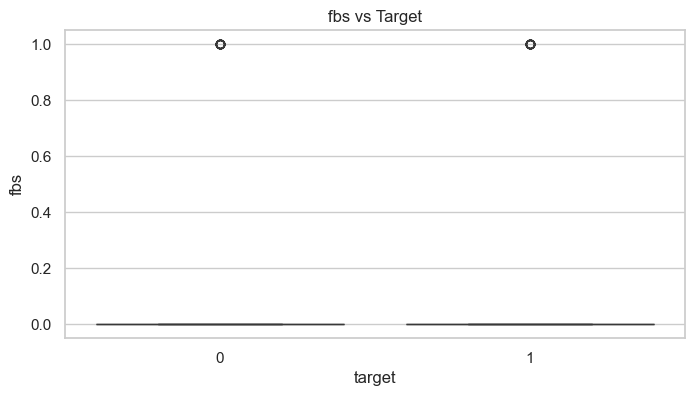

2025-04-23 20:33:33,168 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:33,197 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


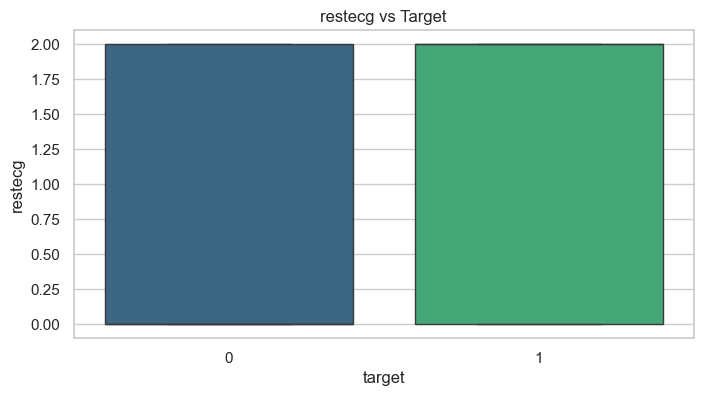

2025-04-23 20:33:33,765 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:33,794 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


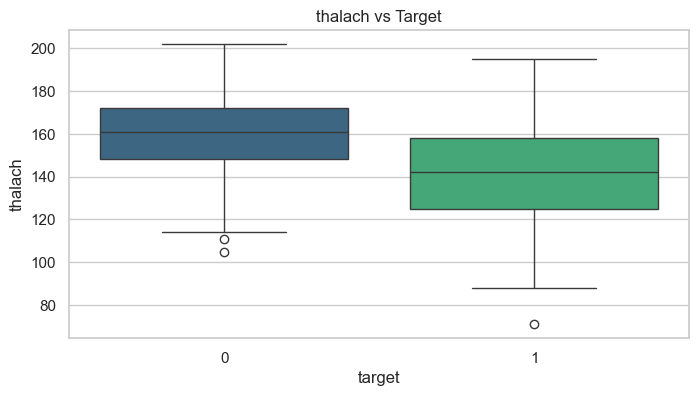

2025-04-23 20:33:34,252 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:34,282 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


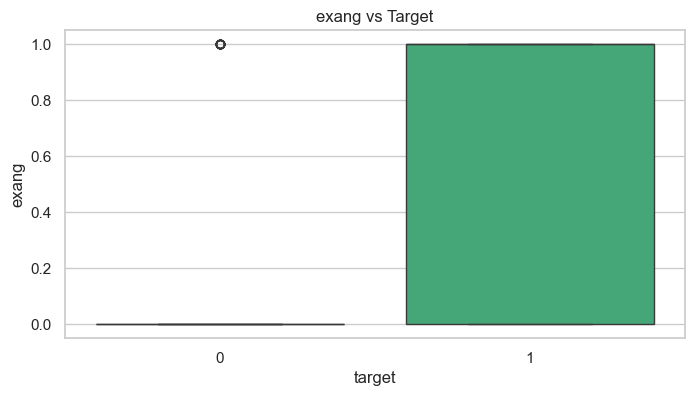

2025-04-23 20:33:34,689 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:34,728 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


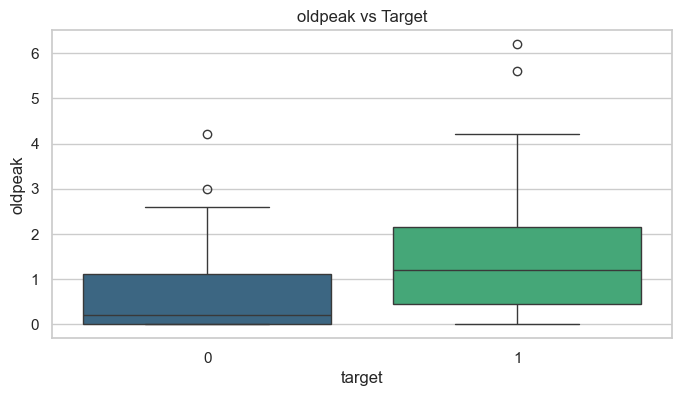

2025-04-23 20:33:35,243 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:35,273 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


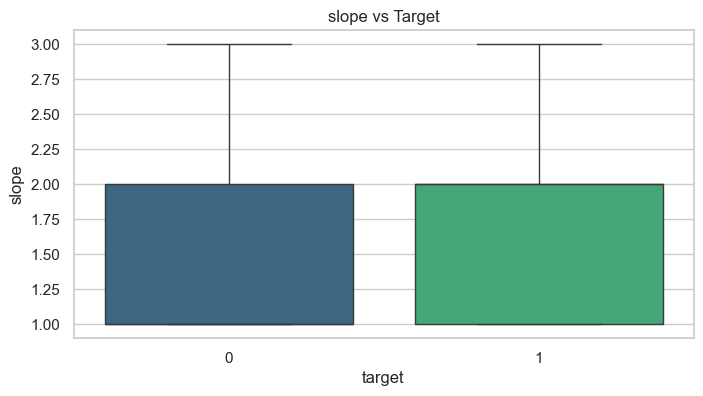

2025-04-23 20:33:35,841 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:35,876 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


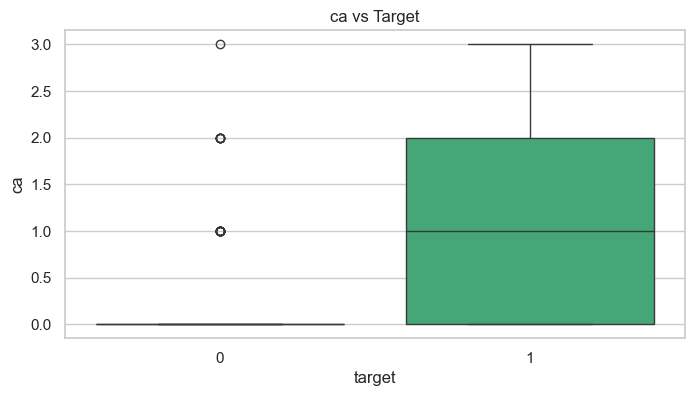

2025-04-23 20:33:36,387 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\CCLeyton\AppData\Local\Temp\ipykernel_28528\2987316898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
2025-04-23 20:33:36,418 - INFO - category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


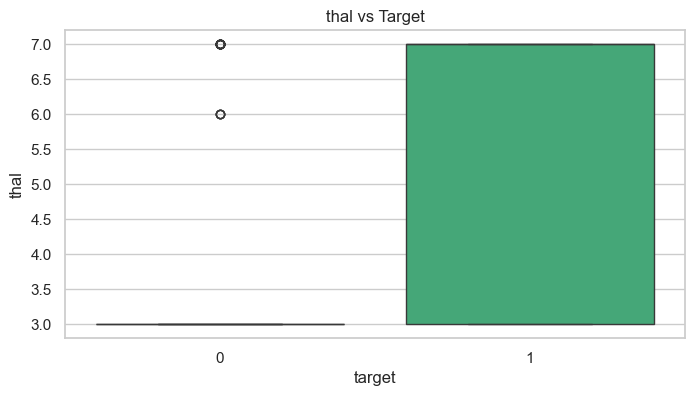

In [9]:
# Cell 6: Numerical Features vs Target (Box Plots)
if train_df is not None:
     print("\n--- Numerical Features vs Target (Box Plots) ---")
     for col in numerical_cols:
         plt.figure(figsize=(8, 4))
         sns.boxplot(x=config.BINARY_TARGET_COLUMN, y=col, data=train_df, palette='viridis')
         plt.title(f'{col} vs Target')
         plt.show()


--- Correlation Matrix ---


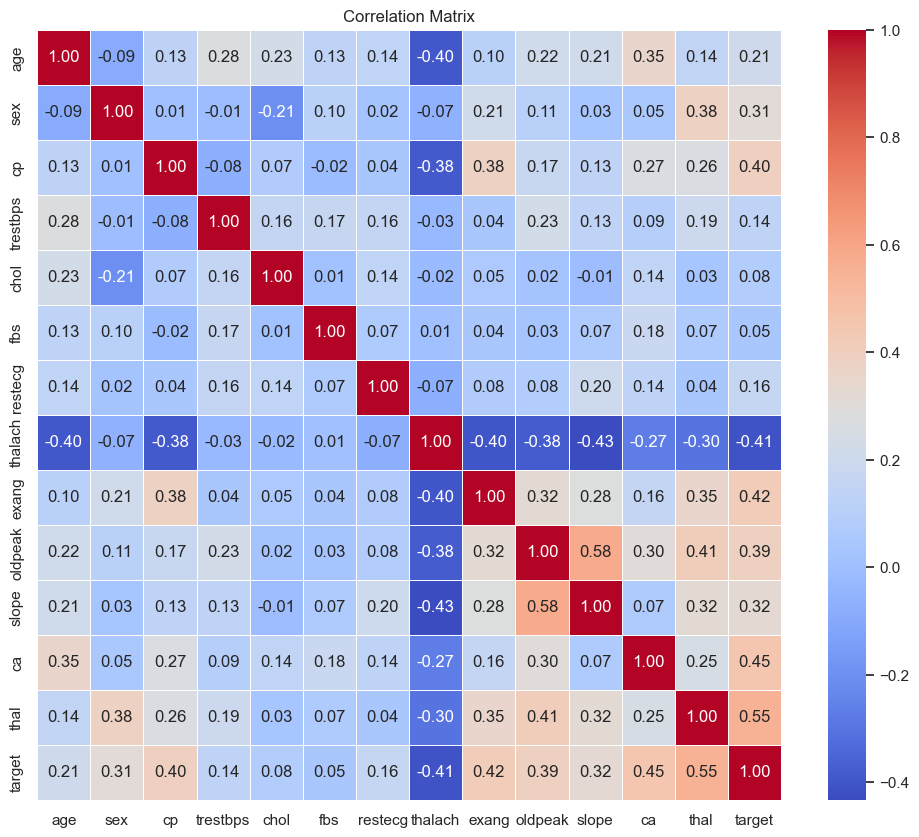


--- Correlation with Target ---
target      1.000000
thal        0.550479
ca          0.452629
exang       0.420280
cp          0.400620
oldpeak     0.392151
slope       0.323349
sex         0.308342
age         0.209664
restecg     0.160363
trestbps    0.136085
chol        0.077191
fbs         0.045889
thalach    -0.409475
Name: target, dtype: float64


In [10]:
# Cell 7: Correlation Matrix
if train_df is not None:
    print("\n--- Correlation Matrix ---")
    plt.figure(figsize=(12, 10))
    corr = train_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix')
    plt.show()

    print("\n--- Correlation with Target ---")
    print(corr[config.BINARY_TARGET_COLUMN].sort_values(ascending=False))